In [54]:
import numpy as np
import pandas as pd
import io
import statsmodels.formula.api as smf
import scipy.stats as stats
import scipy
import seaborn as sns

In [114]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/SwissLabor.csv')
df.head()

,participation,income,age,education,youngkids,oldkids,foreign
0,no,10.787497,3.0,8,1,1,no
1,yes,10.524251,4.5,8,0,1,no
2,no,10.968578,4.6,9,0,0,no
3,no,11.104999,3.1,11,2,0,no
4,no,11.108470,4.4,12,0,2,no


## Спецификация
$$
income=\beta_{0}+\beta_{1}*participation+\beta_{2}*age+\beta_{3}*education
$$

In [100]:
# специфицируем модель через формулу
price_eq = smf.ols(formula='income~participation+age+education', data=df).fit()
# Коэфициенты модели с округление
price_eq.params.round(3)

Intercept               10.269
participation[T.yes]    -0.113
age                      0.016
education                0.043
dtype: float64

In [101]:
# TSS
TSS = price_eq.centered_tss.round(3)
TSS

148.198

In [102]:
# ESS
ESS = price_eq.ess.round(3)
ESS

19.032

In [103]:
# RSS
RSS = price_eq.ssr.round(3)
RSS

129.166

## R^2

$$
R^2 = RSS/TSS
$$

In [104]:
#R^2
R2 = RSS/TSS
R2

0.871577214267399

## s^2
$$
s^2 = RSS/(n - m)
$$

In [121]:
#s^2
s2 = RSS/(872 - 4)
s2

0.14880875576036867

## R^2adj

$$
R^2adj = 1 - (1 - R^2) * (n - 1)/(n - m)
$$

In [122]:
#R^2adj
R2adj = 1 - (1 - R2)*(872-1)/(872 - 4)
R2adj

0.8711333567130236

## Интерпретация 

Если человек является участником рынка труда, его нетрудовой доход уменьшается на 0.113 при прочих равных условиях.

При изменения возраста на 1 год, нетрудовой доход увеличивается на 0.16 при прочих равных условиях.

При изменении значения переменной образования на 1, нетрудовой доход увеличивается на 0.43 при прочих равных условиях.


In [107]:
model = smf.ols(formula='np.log(income)~participation+age+education', data=df).fit()
model.summary(alpha=0.05).tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.3315,0.007,331.910,0.000,2.318,2.345
participation[T.yes],-0.0105,0.003,-4.162,0.000,-0.015,-0.006
age,0.0011,0.001,0.938,0.348,-0.001,0.003
education,0.0040,0.000,9.508,0.000,0.003,0.005


In [108]:
df = pd.read_html(model.summary().tables[1].as_html(), header=0, index_col=0)[0] 
df

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.3315,0.007,331.910,0.000,2.318,2.345
participation[T.yes],-0.0105,0.003,-4.162,0.000,-0.015,-0.006
age,0.0011,0.001,0.938,0.348,-0.001,0.003
education,0.0040,0.000,9.508,0.000,0.003,0.005


In [109]:
df['tvalues']  = df['coef']/df['std err']
df

,coef,std err,t,P>|t|,[0.025,0.975],tvalues
Intercept,2.3315,0.007,331.910,0.000,2.318,2.345,333.071429
participation[T.yes],-0.0105,0.003,-4.162,0.000,-0.015,-0.006,-3.500000
age,0.0011,0.001,0.938,0.348,-0.001,0.003,1.100000
education,0.0040,0.000,9.508,0.000,0.003,0.005,inf


In [110]:
alpha = 0.05 
print('Уровень значимости alpha: ', alpha)
DF = int(model.df_resid) 
t_crit = scipy.stats.t.ppf(1-alpha/2, DF)
print('Критическое значение t_crit: ', t_crit.round(3))

Уровень значимости alpha:  0.05
Критическое значение t_crit:  1.963


In [111]:
df['znachimosty'] = df.apply(lambda x : 'znachim' if np.abs(x['tvalues']) > t_crit else 'ne znachim', axis = 1 )
df

,coef,std err,t,P>|t|,[0.025,0.975],tvalues,znachimosty
Intercept,2.3315,0.007,331.910,0.000,2.318,2.345,333.071429,znachim
participation[T.yes],-0.0105,0.003,-4.162,0.000,-0.015,-0.006,-3.500000,znachim
age,0.0011,0.001,0.938,0.348,-0.001,0.003,1.100000,ne znachim
education,0.0040,0.000,9.508,0.000,0.003,0.005,inf,znachim


## Значимость
Только возраст не значим

<AxesSubplot:xlabel='age', ylabel='income'>

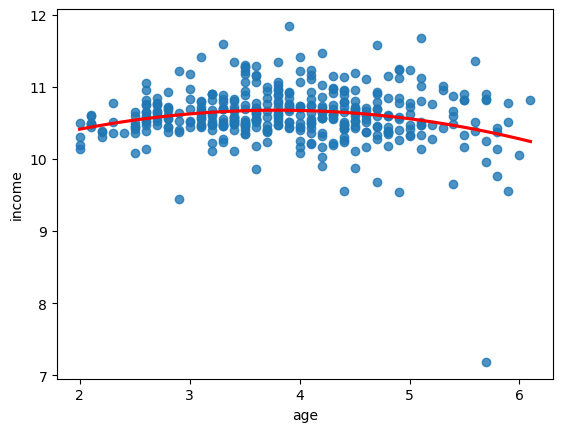

In [119]:
sns.regplot(data=df[df['participation']=='yes'], y='income', x='age', ci=None, order = 2, line_kws={"color": "r"})

<AxesSubplot:xlabel='age', ylabel='income'>

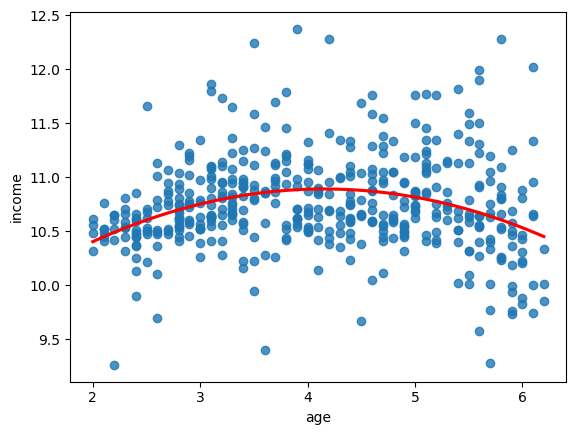

In [120]:
sns.regplot(data=df[df['participation']=='no'], y='income', x='age', ci=None, order = 2, line_kws={"color": "r"})

## Интерпретация
Среди тех, кто не является участником рынка труда, разброс нетрудового дохода больше.


In [126]:

price_eq1 = smf.ols(formula='income~-1+participation+age+education', data=df).fit()

price_eq1.params.round(3)

participation[no]     10.269
participation[yes]    10.156
age                    0.016
education              0.043
dtype: float64

In [127]:
# TSS
TSS = price_eq1.centered_tss.round(3)
TSS

148.198

In [128]:
# ESS
ESS = price_eq1.ess.round(3)
ESS

19.032

In [129]:
# RSS
RSS = price_eq1.ssr.round(3)
RSS

129.166

In [130]:
#R^2
R2 = RSS/TSS
R2

0.871577214267399

## Интерператция 
Коэффициенты детерминации регрессии с константой и без совпадают. Коэффициент детерминации показывает, в какой мере признак зависит от параметров модели. Так как константа не является параметром модели, коэффициенты детерминации в регрессиях с константой и без одинаковы.